## Yelp Reviews Analysis

In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# models
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
!pip install textblob

In [3]:
from textblob import TextBlob

In [4]:
# read yelp.csv into a DataFrame
yelp = pd.read_csv('reviews.csv')

In [5]:
yelp # reviews of the restaurants

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
...                      ...         ...                     ...    ...   
9995  VY_tvNUCCXGXQeSvJl757Q  2012-07-28  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg  2012-01-18  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  2010-11-16  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA  2012-12-02  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my birthday for breakf...  review   
1     I have no idea why some people give bad review...  review   
2     love the gyro plate. Rice is so good and I als...  review   
3     Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4     General Manager Scott Petello is a good egg!!!...  review   
...                                                 ...     ...   
9995  First visit...Had lunch here today - used my G...  review   
9996  Should be called house of deliciousness!\n\nI ...  review   
9997  I recently visited Olive and Ivy for business ...  review   
9998  My nephew just moved to Scottsdale recently so...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id  cool  useful  funny  
0     rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1     0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2     0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3     uZetl9T0NcROGOyFfughhg     1       2      0  
4     vYmM4KTsC8ZfQBg-j5MWkw     0       0      0  
...                      ...   ...     ...    ...  
9995  _eqQoPtQ3e3UxLE4faT6ow     1       2      0  
9996  ROru4uk5SaYc3rg8IU7SQw     0       0      0  
9997  gGbN1aKQHMgfQZkqlsuwzg     0       0      0  
9998  0lyVoNazXa20WzUyZPLaQQ     0       0      0  
9999  KSBFytcdjPKZgXKQnYQdkA     0       0      0  

[10000 rows x 10 columns]

In [6]:
# about the dataset
# we have data for different business_ids(thats differnt restaurants)
# we have date on which these reviews are published
# review_ids & user_ids 
# review, thats the text about their experience at the particular restaurant
# and some other comments on these reviews as cool, funny, useful

In [7]:
## Data inspection 

In [8]:
yelp.shape # we have 10,000 reviews in this data set thats or corpus

(10000, 10)

In [9]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [10]:
yelp.business_id.nunique() # total restaurant counts

4174

In [11]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [12]:
yelp.sort_values(by = 'stars') # lowermost to highermost ratings 

business_id        date               review_id  stars  \
3456  0VLZj0f3llL9IkL5GOT3lg  2011-10-26  tuNdSzBSNmcwUXHLY0re0A      1   
1747  eGj1NnvbIUVWgDYQWEOwQg  2012-06-10  MEzqi22MaWQV1LMSSPmh6Q      1   
5543  kJFS_3WlP6TFdNUYt6V6FA  2011-09-26  mSB78PqDRD7jE5g4yZuaMQ      1   
4934  e8FMAuTswDueAlLsNyLhcA  2010-02-11  4vvdwQyS5uCSo74iw81irw      1   
7037  FYCVF_1qYm3x5DYCbmmK1g  2012-10-26  sTZU3JC26VsqnEMSw6kWEw      1   
...                      ...         ...                     ...    ...   
4942  sv8tYgFzIRKHHERURumyVQ  2012-08-07  tJ40zwu59uXmTh_PmWg7-g      5   
4940  byhwHi0lhYdyY5kSpuqoaQ  2012-10-16  f_Tcz7mZ6dELW_qNWCrLeQ      5   
4938  y9cQ0DBC0qFNgkpTXHzokA  2009-06-09  EHpwtXCYq8uIlxGjdcRfuw      5   
4953  jJhNOhuGpIsJX5SEUFFWYQ  2008-03-25  EQu1fQG8Qd9QJ5Jw4-u90A      5   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
3456  My husband and I went there for our first time...  review   
1747  This dog park gets one star.Why?Because the la...  review   
5543  This review is for the bar only.\nI had a date...  review   
4934  I'd have to disagree with the person who said ...  review   
7037  3 months, 22 emails, 10 plus calls and (I thin...  review   
...                                                 ...     ...   
4942  Love this lake. Went paddle boarding a few wee...  review   
4940  Best happy hour in north Scottsdale! Get there...  review   
4938  DUDE..where is the manga....where are the card...  review   
4953  Ted's rules.  Great char-grilled hot dogs, kil...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id  cool  useful  funny  
3456  E8FSWBUXArSJU7cWpBXF7Q     0       0      0  
1747  qBAaWZxyuFnSZU0NzFlNDw     0       0      0  
5543  AYGHNy8gPxl2Q-etTT3hZw     2       6      6  
4934  W5Pd_GmMem2LdHZkoxQCtw     0       0      0  
7037  EiD6jKEPhaPIWRvk4AQPDw     0       0      0  
...                      ...   ...     ...    ...  
4942  89H9-Ius_EWMhAQ4zZuvOw     0       0      0  
4940  370JyOQfFcPSB9_jk641gA     0       0      0  
4938  jQxxHLXLbFsNYNWNdSjRKQ     1       2      4  
4953  clTYUJCL-rHnVIS2WePRwA     0       0      0  
9999  KSBFytcdjPKZgXKQnYQdkA     0       0      0  

[10000 rows x 10 columns]

In [13]:
yelp.sort_values(by = 'stars', ascending = False).head()

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
4953  jJhNOhuGpIsJX5SEUFFWYQ  2008-03-25  EQu1fQG8Qd9QJ5Jw4-u90A      5   
4972  uKSX1n1RoAzGq4bV8GPHVg  2012-11-17  Kw3g_nAZEW3bsKxW_bC1aA      5   
4968  iV7D7fHKb-bF9fCL_bEMtA  2012-11-25  lfP-h9GlmgqqAlqcPgvXhQ      5   
4967  7p0OI2Ld46-EzJkRHGQEJQ  2011-09-04  TDgU176i8wejwZ-tBQLrxA      5   

                                                   text    type  \
0     My wife took me here on my birthday for breakf...  review   
4953  Ted's rules.  Great char-grilled hot dogs, kil...  review   
4972  Terrific food and service. Happy hour from 3-6...  review   
4968                                         Excellent.  review   
4967  Love Bakers. I live in Glendale an it is worth...  review   

                     user_id  cool  useful  funny  
0     rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
4953  clTYUJCL-rHnVIS2WePRwA     0       0      0  
4972  Hm8mxRyPSQqTPq0JVWNSpw     0       0      0  
4968  e-89w7FUWyUKgAELA75E3w     0       0      0  
4967  ITBs8txD0Zu-YuxXCGqokA     0       1      0

In [14]:
yelp.stars.value_counts(normalize = True) # proportion of the star rating distribution, most are rated 4 or 5 stars

stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64

In [15]:
yelp.isna().sum() # no missing values 

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [16]:
for i in ['cool','useful','funny']:
    print('\n',yelp[i].value_counts())


 cool
0     6290
1     1955
2      749
3      396
4      209
5      119
6       88
7       41
8       31
10      30
11      17
9       15
13      14
14      10
12       9
16       6
17       5
15       5
18       1
22       1
28       1
21       1
19       1
20       1
23       1
77       1
27       1
38       1
32       1
Name: count, dtype: int64

 useful
0     4130
1     2848
2     1323
3      711
4      335
5      222
6      114
7       91
8       52
9       38
10      29
12      20
11      19
15      17
13      12
14       8
19       6
16       6
17       5
18       5
20       2
28       1
23       1
24       1
76       1
31       1
38       1
30       1
Name: count, dtype: int64

 funny
0     7013
1     1632
2      603
3      271
4      161
5       90
6       68
7       34
8       25
9       21
10      18
11      14
12      11
15       5
16       5
20       5
17       4
13       3
14       3
24       2
22       2
19       2
18       2
21       1
27       1
23       1
30       1


In [17]:
# Average rating corersponding to each restaurant

In [18]:
yelp.groupby(by ='business_id')['stars'].mean() #yelp.groupby(by ='business_id').stars.mean()

business_id
-0QBrNvhrPQCaeo7mTo0zQ    4.000000
-0bUDim5OGuv8R0Qqq6J4A    3.000000
-1N0Z3uM8xbxKS8XiAnaog    1.000000
-34jE_5dujSWMIOBudQsiQ    5.000000
-3WVw1TNQbPBzaKCaQQ1AQ    3.333333
                            ...   
zwToyWL4dT1clsFPK9wI2w    3.333333
zxjMiqlfUuIQRltSuj9FpQ    1.000000
zxqvU415r_RtZRKDtdbIKQ    5.000000
zyCrtvCPdSZDhUrH86vbeA    3.000000
zyYRWnimLbQt9aCCI_2MZw    5.000000
Name: stars, Length: 4174, dtype: float64

In [19]:
yelp[['business_id','stars']].groupby(by = 'business_id').mean().reset_index().sort_values(by = 'stars', ascending = False)

business_id  stars
4173  zyYRWnimLbQt9aCCI_2MZw    5.0
2990  i0d1RvC0RcjT53S-2GZsgw    5.0
2964  heszpsyNiT3i8MEOk04sUw    5.0
1101  FgyBmc-XS_ViFAf8Wy25yA    5.0
2969  hkKvb6oXxn8ygoP5fFln1g    5.0
...                      ...    ...
1663  O2Fq4v8QW1EeULVvrnrnBQ    1.0
3853  v1zN2kMLLB3B-D8FTEOWkQ    1.0
3453  ou5yH_kNEiN8J_GTSGYSvg    1.0
3220  lQ22GkzG0tIJRbzkpMbJxw    1.0
880   COc06ScpJTN15NXMf4gkqA    1.0

[4174 rows x 2 columns]

In [20]:
## Average rating  & total number of users corersponding to each restaurant
yelp[['business_id','stars', 'user_id']].groupby(by = 'business_id').agg({'user_id':'count', 'stars':'mean'}).reset_index().sort_values(by = 'user_id', ascending = False)

# yelp.groupby(by ='business_id').stars.agg(['mean','count'])

business_id  user_id     stars
1367  JokKtdXU7zXHcr20Lrk29A       37  4.513514
3382  ntN85eu27C04nwyPa8IHtw       37  3.945946
2957  hW0Ne_HTHEAgGF1rAdmR-g       34  3.264706
2224  WNy1uzcmm_UHmTyR--o5IA       32  4.343750
2162  VVeogjZya58oiTxK7qUjAQ       31  4.193548
...                      ...      ...       ...
1797  Q1A_wVZypQeM1A3f61wq_A        1  3.000000
1798  Q1cSwGiy-RU9XXf9T7HqRw        1  2.000000
1800  Q5ZD7ZAs96NAVblFDV476g        1  1.000000
1801  Q6exnM7RmHdNMZqegdrmoA        1  5.000000
4173  zyYRWnimLbQt9aCCI_2MZw        1  5.000000

[4174 rows x 3 columns]

In [21]:
# which user provided the frequent reviews?
yelp.groupby('user_id').review_id.count().nlargest(1)

user_id
fczQCSmaWF78toLEmb0Zsw    38
Name: review_id, dtype: int64

In [22]:
yelp.groupby('user_id').review_id.count().reset_index().sort_values(by = 'review_id',ascending = False).iloc[0]

user_id      fczQCSmaWF78toLEmb0Zsw
review_id                        38
Name: 4376, dtype: object

In [23]:
yelp.groupby('user_id').review_id.count().idxmax()

'fczQCSmaWF78toLEmb0Zsw'

In [24]:
yelp.user_id.value_counts().index[0]

'fczQCSmaWF78toLEmb0Zsw'

In [25]:
# what are the correlations between useful, funny and cool features? Do you think, there is a multicollinearity?

In [26]:
yelp[['cool','useful','funny']].corr()# three of these are highly correlated 

cool    useful     funny
cool    1.000000  0.887102  0.764342
useful  0.887102  1.000000  0.723406
funny   0.764342  0.723406  1.000000

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif = {}
for i in range(3):
    vif[i] = variance_inflation_factor(yelp[['cool','useful','funny']], i)


In [28]:
vif #  they can be multicollinear, as they have collineraity higher than 5,  but these are not important for us

{0: 6.28030075300904, 1: 5.459354155603145, 2: 2.794884479748581}

In [29]:
# which restaurant recevied the highest positive review(>=4)

In [30]:
yelp[yelp.stars>=4].groupby('business_id')['stars'].count().sort_values(ascending  = False).nlargest(1).index[0]

'JokKtdXU7zXHcr20Lrk29A'

In [31]:
# which restaurant recevied the highest bad review

In [32]:
yelp[yelp.stars==1].groupby('business_id')['stars'].count().sort_values(ascending  = False).nlargest(1).index[0]

'nfyqtEoufkhjv97IueK7Ow'

In [33]:
# are there any paid reviews? cosine or other distance metrics similarity between the two text messages can also be tell 
# us that they are almost similar & written by the same person
# this we will see later in this notebook

## Basic Explorartory Analysis

In [34]:
# On text we can perform analysis using below techiques
# Wordcloud
# sentiment analysis
# most frequent words bar charts 
# document similarity or review similarities
# similarity between words 

In [35]:
# for documnet feature matrix, extraction 

In [36]:
df = yelp.copy()
df['text'] = df['text'].astype('str')

In [37]:
# unique words 
df['unique_word_count'] = df['text'].apply(lambda x : len(set(str(x).split())))

In [38]:
# count words 
df['word_count'] = df['text'].apply(lambda x : len((str(x).split())))

In [39]:
# character counts/ letter counts 
df['char_count'] = df['text'].apply(lambda x : len((str(x))))

In [40]:
# word density
df['words_density'] = df['char_count']/(df['word_count']+1)

In [41]:
# punctuation counts
df['punctuation_counts'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [42]:
df['punctuation_counts']

0       21
1       36
2        3
3       18
4       38
        ..
9995    27
9996    14
9997    31
9998    64
9999    28
Name: punctuation_counts, Length: 10000, dtype: int64

In [43]:
# upper case word count
df['upper_case_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [44]:
df['upper_case_word_count'] 

0       3
1       6
2       1
3       2
4       2
       ..
9995    1
9996    4
9997    7
9998    5
9999    2
Name: upper_case_word_count, Length: 10000, dtype: int64

In [45]:
# lower case word count
df['lower_case_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

In [46]:
df['lower_case_word_count']

0       134
1       225
2        13
3        61
4        70
       ... 
9995     93
9996    148
9997    231
9998    128
9999     64
Name: lower_case_word_count, Length: 10000, dtype: int64

In [47]:
# titled word counts
df['titled_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [48]:
df['titled_word_count'] 

0       16
1       25
2        2
3       13
4       12
        ..
9995    20
9996    13
9997    28
9998     9
9999    11
Name: titled_word_count, Length: 10000, dtype: int64

In [49]:
import nltk
nltk.download('stopwords')
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navjo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# NO of stopwords
df['stopwords_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

In [51]:
# average length of words
df['stopwords_count']

0        71
1       134
2         6
3        33
4        44
       ... 
9995     50
9996     72
9997    124
9998     63
9999     32
Name: stopwords_count, Length: 10000, dtype: int64

In [52]:
# Number of NUmeric 
df['numeric_numbers'] =  df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [53]:
df['numeric_numbers']

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    2
9998    1
9999    1
Name: numeric_numbers, Length: 10000, dtype: int64

In [54]:
# Number of alphanumeric 
df['alphanumeric'] =  df['text'].apply(lambda x: len([x for x in x.split() if x.isalnum()]))

In [55]:
df['alphanumeric']

0       135
1       227
2        14
3        60
4        69
       ... 
9995     96
9996    147
9997    231
9998    121
9999     61
Name: alphanumeric, Length: 10000, dtype: int64

In [56]:
# Number of alphabets  
df['alphabets'] =  df['text'].apply(lambda x: len([x for x in x.split() if x.isalpha()]))

In [57]:
df['alphabets']

0       134
1       227
2        14
3        60
4        69
       ... 
9995     96
9996    147
9997    229
9998    119
9999     60
Name: alphabets, Length: 10000, dtype: int64

In [58]:
# NO of spaces   
df['spaces'] =  df['text'].apply(lambda x: len([x for x in x.split() if x.isspace()]))

In [59]:
df['spaces']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: spaces, Length: 10000, dtype: int64

In [60]:
# No pf words ending with   
df['words_end_with'] =  df['text'].apply(lambda x: len([x for x in x.lower().split() if x.endswith('et')]))

In [61]:
df['words_end_with']

0       3
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: words_end_with, Length: 10000, dtype: int64

In [62]:
# No pf words starts with   
df['words_starts_with'] =  df['text'].apply(lambda x: len([x for x in x.lower().split() if x.startswith('on')]))

In [63]:
df['words_starts_with']

0       4
1       2
2       0
3       0
4       0
       ..
9995    2
9996    5
9997    3
9998    2
9999    2
Name: words_starts_with, Length: 10000, dtype: int64

In [64]:
# wordcounts
df['wordcounts'] = df['text'].apply(lambda x :{t: x.split().count(t) for t in set(x.split())})

In [65]:
df['wordcounts']

0       {'food': 1, 'had.': 2, '2': 1, 'Anyway,': 1, '...
1       {'So,': 1, '"Here's': 1, 'bad': 3, 'decided': ...
2       {'the': 1, 'I': 1, 'dig': 1, 'so': 1, 'plate.'...
3       {'Dog': 1, 'sniff!': 1, 'ducks.': 1, 'lot': 1,...
4       {'recover': 1, 'Not': 1, 'be': 1, 'life!!': 1,...
                              ...                        
9995    {'food': 1, 'much': 1, 'both': 1, 'should': 1,...
9996    {'house': 1, 'asian': 1, 'food': 1, 'through':...
9997    {'visits,': 1, 'bad': 1, 'food': 1, 'restauran...
9998    {'tables,': 1, 'hitting': 1, 'seem': 1, '2': 1...
9999    {'think': 2, 'parts"romantic"': 1, 'on': 2, 'i...
Name: wordcounts, Length: 10000, dtype: object

In [66]:
# pos tagging
pos_family = {
    'noun' : ['NN', 'NNS', 'NNP','NNPS' ],
    'pron' : ['PRP', 'PRP$','WP','WP$'],
    'verb' : ['VB', 'VBD','VBG','VBN','VBP','VBZ'],
    'adj'  : ['JJ', 'JJR','JJS'],
    'adv'  : ['RB', 'RBR','RBS','WRB']
}  

In [67]:
#function to check and get the part of speech tag count of a words in a given sentence

def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup) [1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [68]:
df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [69]:
# functionality of the textblob: sentiment analysis

In [70]:
yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [71]:
TextBlob(yelp.text[0]).sentiment.polarity

0.40246913580246907

In [72]:
yelp.text[1747]

"This dog park gets one star.Why?Because the last time I went,some piece of shit broke into just about every car in the parking lot to steal whatever they could.So much broken glass from side windows everywhere.\nIt used to be okay before this incident,but a busy parking lot in borad daylight and some vulture lies in wait?\nYeah,I'm done here."

In [73]:
TextBlob(yelp.text[1747]).sentiment.polarity

-1.6653345369377347e-17

In [74]:
# sentiment scores feature added to the dataframe
yelp['sentiment_score'] = yelp['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [75]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment_score  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         0.402469  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         0.229773  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0         0.566667  
3  uZetl9T0NcROGOyFfughhg     1       2      0         0.608646  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0         0.468125

In [76]:
yelp['sentiment_score'].min() # ranges from 1 to -1

-1.0

In [77]:
yelp['sentiment'] = np.where(yelp.sentiment_score >0.5,'Positive',np.where(yelp.sentiment_score <-0.5,'Negative','Neutral'))

In [78]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment_score sentiment  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         0.402469   Neutral  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         0.229773   Neutral  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0         0.566667  Positive  
3  uZetl9T0NcROGOyFfughhg     1       2      0         0.608646  Positive  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0         0.468125   Neutral

In [79]:
pd.crosstab(yelp.stars, yelp.sentiment) # correlation betwenn sentiments & stars ratings 

sentiment  Negative  Neutral  Positive
stars                                 
1                20      723         6
2                 2      911        14
3                 0     1411        50
4                 4     3231       291
5                 2     2805       530

In [80]:
# these are some good reviews but interpreted wrong, we can also remove them for better model training
yelp[((yelp.sentiment == 'Negative')& (yelp.stars>=4))].text 

1287    Obsessed. Like, I've-got-the-Twangy-Tart-withd...
3735                   burnt.\nchina china caught fire :(
5200         realized I rank this a 3, what am I insane??
6726    Brown bag chicken sammich, mac n cheese, fried...
8453      "They outta chicken or day just dont had none."
9948                             No more dinner hours! :(
Name: text, dtype: object

In [81]:
Positive_reviews = yelp.text[yelp.stars>=4]

In [82]:
Negative_reviews = yelp.text[yelp.stars<4]

In [83]:
Positive_reviews.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [84]:
Negative_reviews.head()

15    Was it worth the 21$ for a salad and small piz...
16    We went here on a Saturday afternoon and this ...
18    I met a friend for lunch yesterday. \n\nLoved ...
20    DVAP....\n\nYou have to go at least once in yo...
23    U can go there n check the car out. If u wanna...
Name: text, dtype: object

In [85]:
# cleaning text & pre_processing the data 
# spelling correction
# punctuation marks removal 
# special characters removal 
# stemming 
# lemmatization
# tokenization
# stopwords removal

In [86]:
import re
import string

# Example text
text = "Hello, world! This is a sample text with punctuation."

# Remove punctuation using re.sub()
clean_text = re.sub('[' + string.punctuation + ']', ' ', text)

print(clean_text)

Hello  world  This is a sample text with punctuation 


In [87]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace('favorites', "favorite").replace('cons', '')
    text = re.sub(r' +', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)  # Remove special characters
    return text

In [110]:
import string
def pre_process(text):
    #text = text.apply(lambda x: " ".join([x.translate(str.maketrans('', '', string.punctuation)) for x in x.split()]))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer 
    #text = text.apply(lambda x: " ".join([WordNetLemmatizer.lemmatize(word) for word in x.split()]))  #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [111]:
yelp['reviews'] = yelp.text.apply(lambda x: clean_text(x))

In [112]:
yelp['reviews'] = pre_process(yelp.reviews)

In [113]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment_score sentiment  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         0.402469   Neutral   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         0.229773   Neutral   
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0         0.566667  Positive   
3  uZetl9T0NcROGOyFfughhg     1       2      0         0.608646  Positive   
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0         0.468125   Neutral   

                                             reviews  
0  wife took birthday breakfast excel weather per...  
1  idea peopl give bad review place goe show plea...  
2    love gyro plate rice good also dig candi select  
3  rosi dakota love chaparr dog park conveni surr...  
4  gener manag scott petello good egg go detail l...

In [114]:
yelp['new_score'] = yelp.reviews.apply(lambda x: TextBlob(x).sentiment.polarity )
# with polarity there are the chances to fetch some bad results

In [115]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  sentiment_score sentiment  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         0.402469   Neutral   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         0.229773   Neutral   
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0         0.566667  Positive   
3  uZetl9T0NcROGOyFfughhg     1       2      0         0.608646  Positive   
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0         0.468125   Neutral   

                                             reviews  new_score  
0  wife took birthday breakfast excel weather per...   0.477778  
1  idea peopl give bad review place goe show plea...   0.060256  
2    love gyro plate rice good also dig candi select   0.600000  
3  rosi dakota love chaparr dog park conveni surr...   0.422222  
4  gener manag scott petello good egg go detail l...   0.333333

In [116]:
Positive_review = yelp.reviews[yelp.stars>=4] # based on stars we will divided data into positive & neagtive reviews 
Negative_review = yelp.reviews[yelp.stars<4]

In [117]:
Positive_review = Positive_review.apply(lambda x: clean_text(x))
Positive_review = pre_process(Positive_review)

In [118]:
Negative_review = Negative_review.apply(lambda x: clean_text(x))
Negative_review = pre_process(Negative_review)

In [119]:
!pip install wordcloud

In [124]:
from wordcloud import WordCloud

In [125]:
' '.join(Positive_review.tolist())# maked corpus of positive reviews

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semibusi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ive ever im pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came 2 piec griddl bread amaz absolut made meal complet best toast ive ever anyway cant wait go back idea peopl give bad review place goe show plea everyon probabl gripe someth faultther mani peopl like case friend arriv 550 pm past sunday pretti crowd thought sunday even thought would wait forev get seat said well seat girl come back seat someon el seat 552 waiter came got drink order everyon pleasant host seat us waiter server price good well place order decid want 602 share bake spaghetti calzon small beef pizza tri calzon huge got smallest one person got small 11 pizza awesom friend like pizz

In [127]:
stop1 = set(list(stop)+['place','food','drink', 'get', 'one','time', 'also','got', 'would', 'dont','go'])
# added few more words to predefined stowords list

In [128]:
wordcloud = WordCloud(stopwords=stop1).generate(' '.join(Positive_review.tolist()))

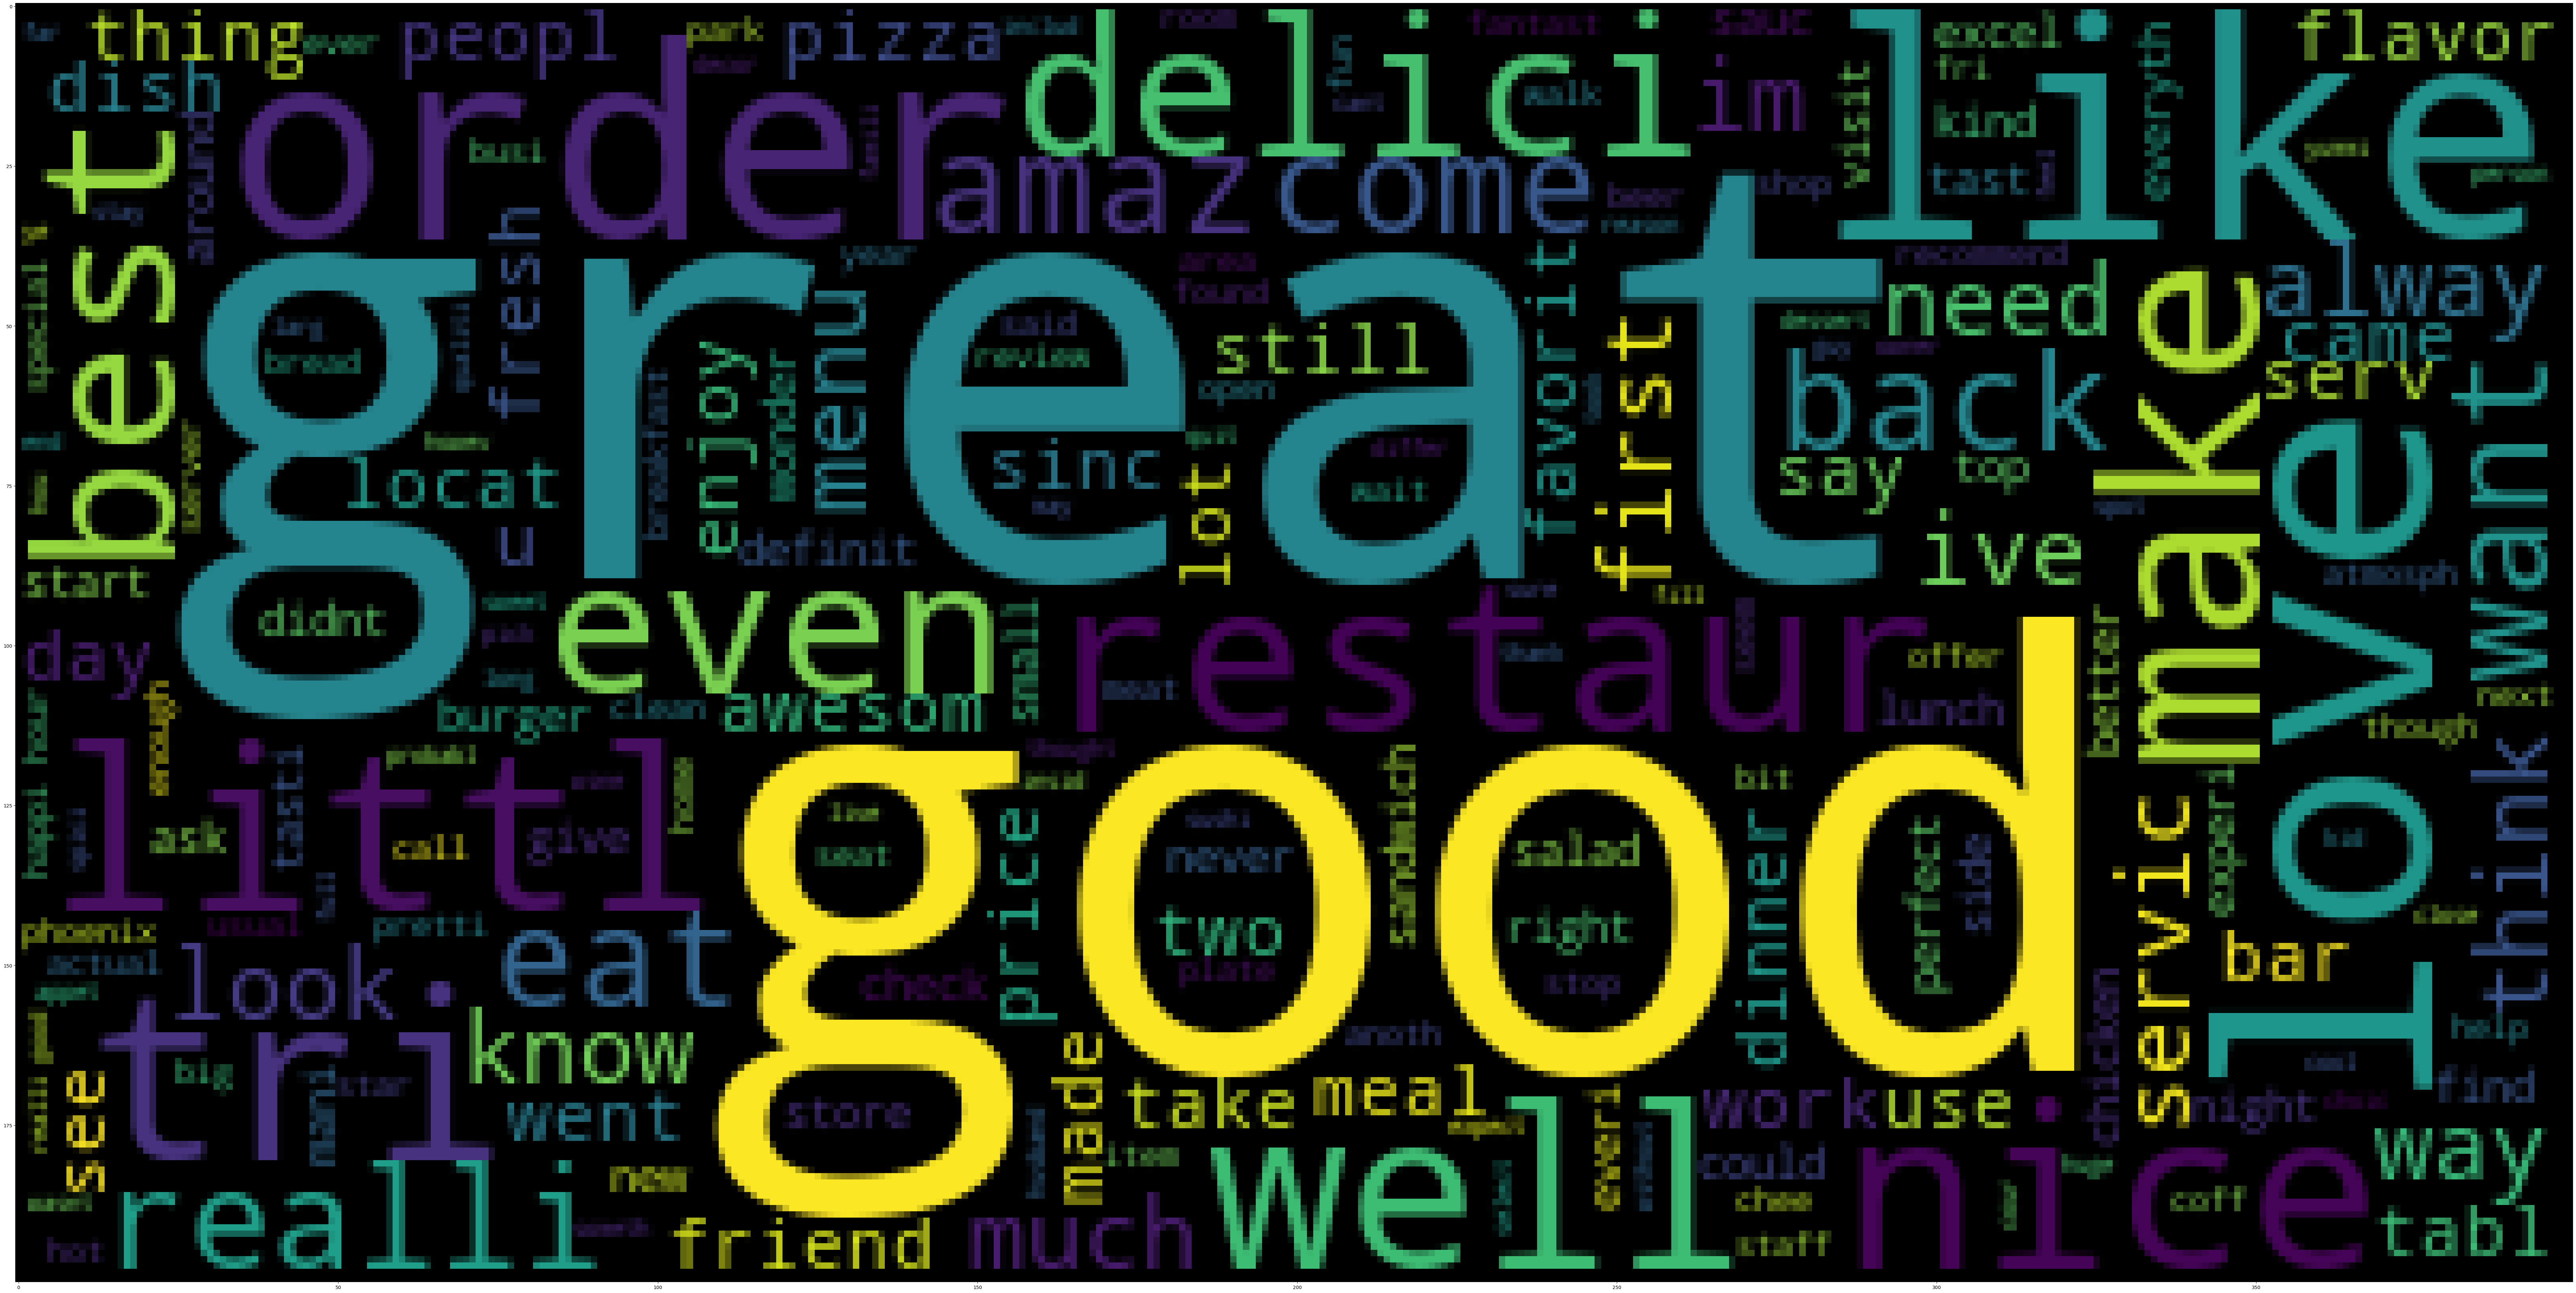

In [129]:
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

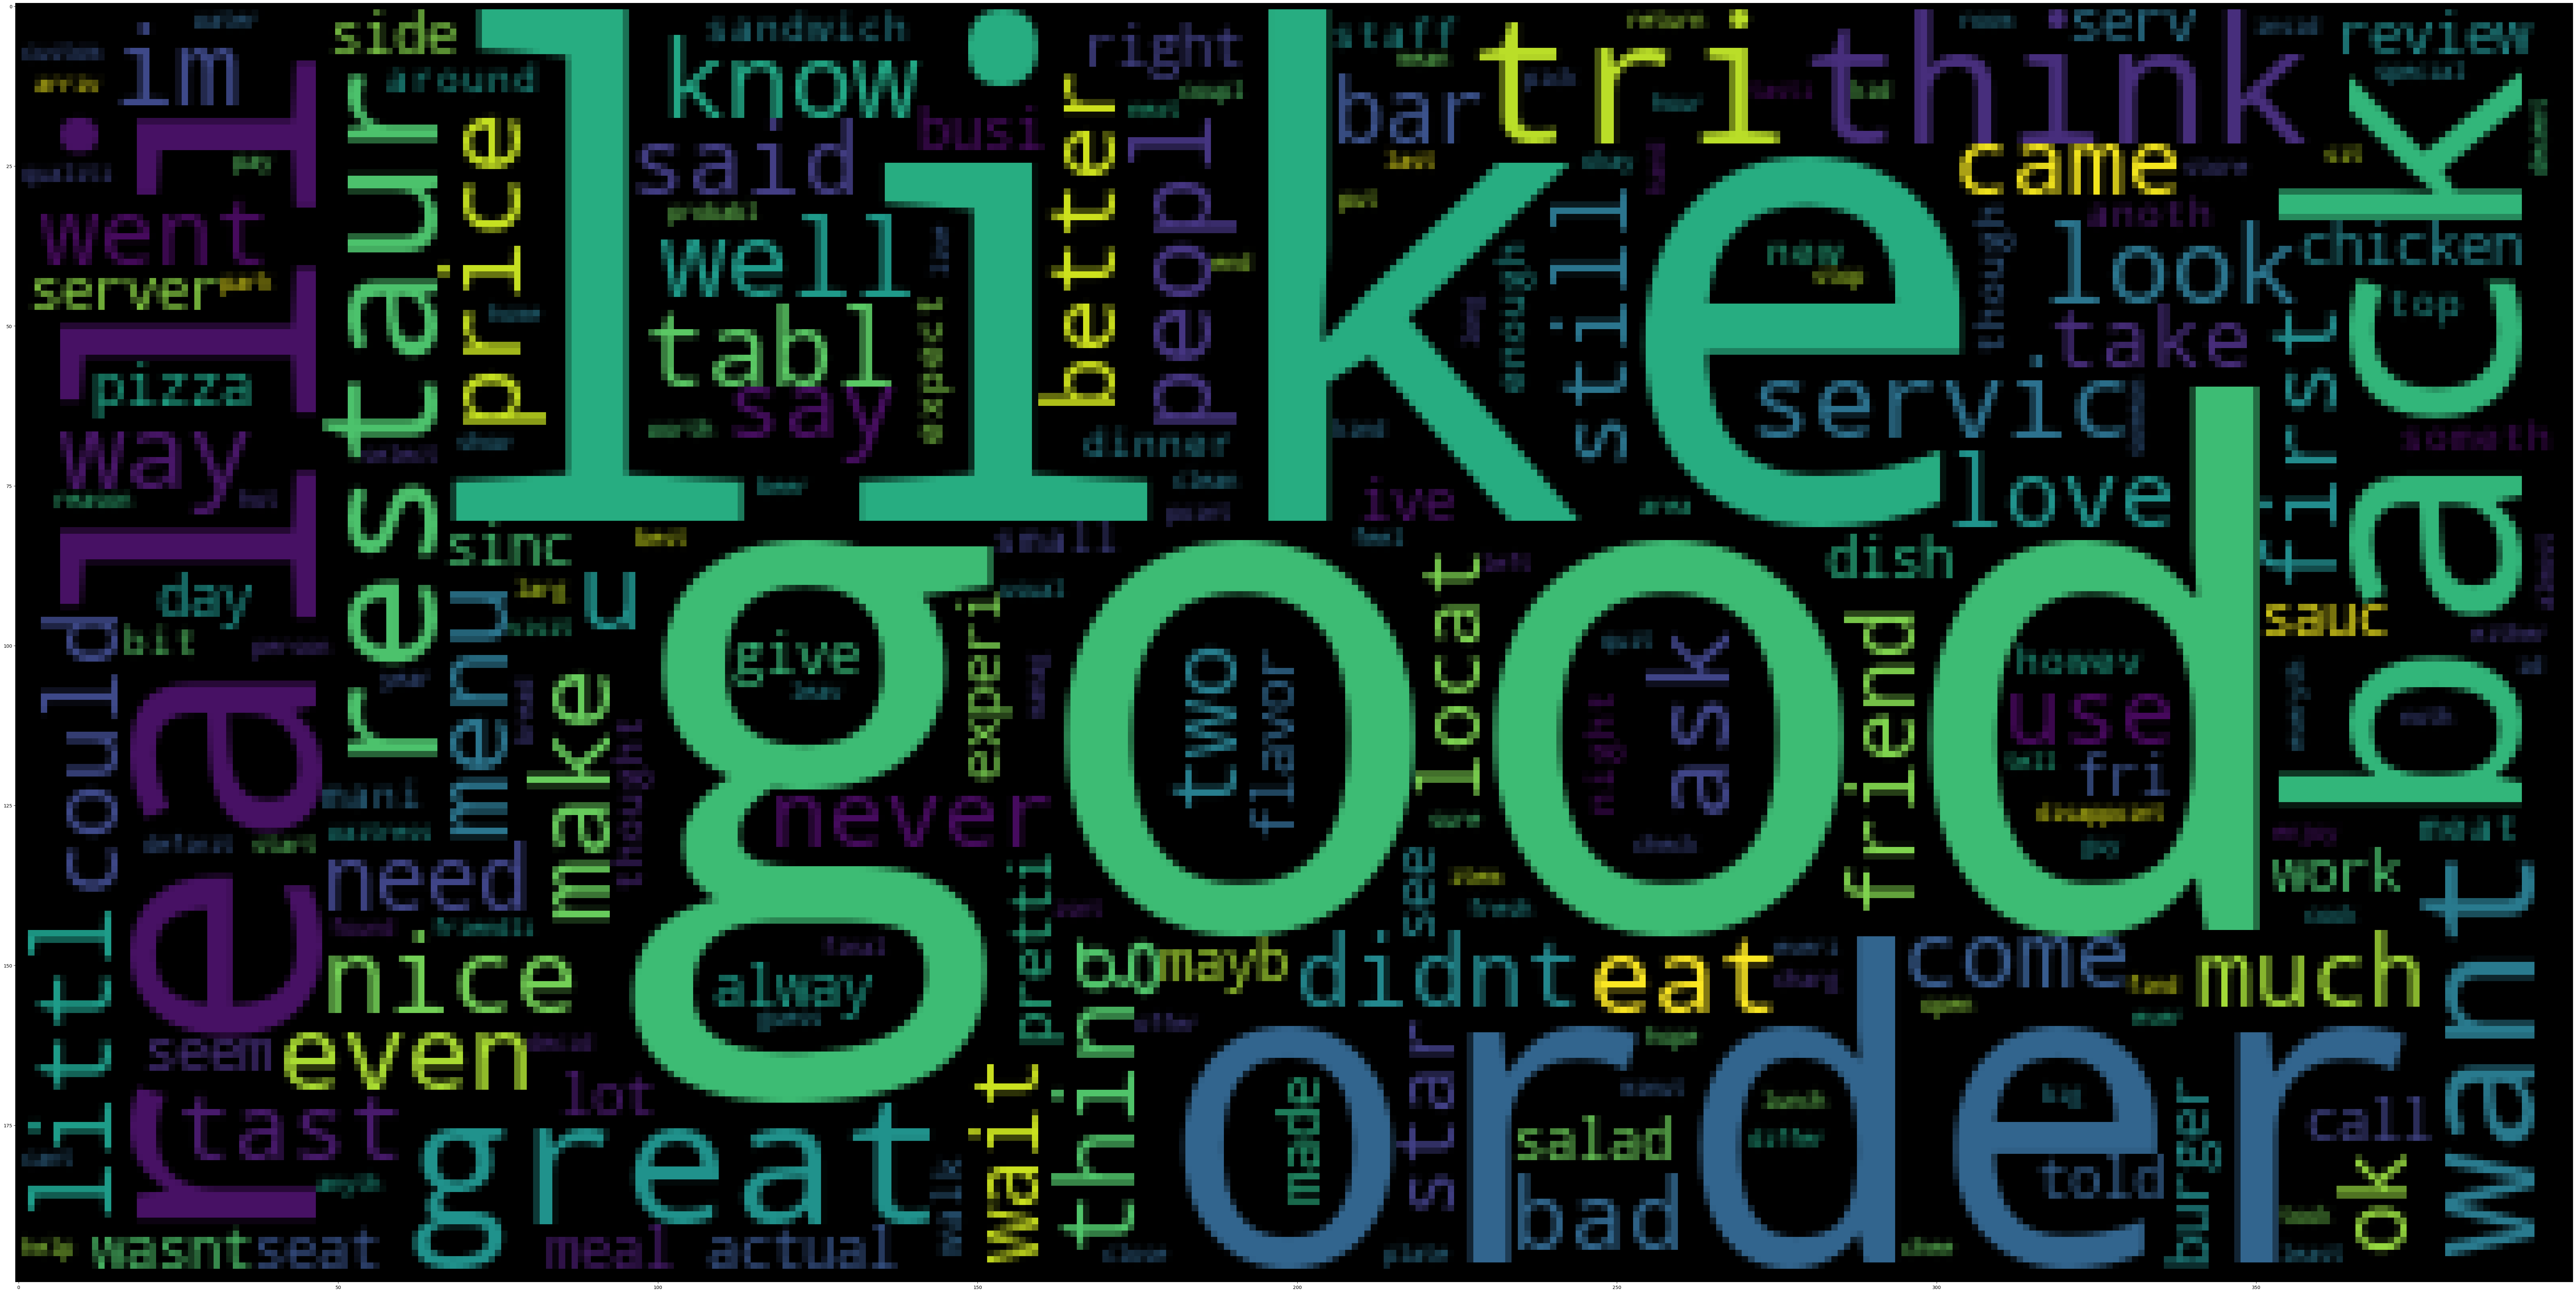

In [130]:
wordcloud = WordCloud(stopwords=stop1).generate(' '.join(Negative_review.tolist()))
# put all the negtive reviews in a form of one paragraph, creates a corpus of words to be fed to the worldcloud.

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [131]:
# creating a countvectorizer for both positive & negative reviews, DTM matrics

In [132]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             # tokenize on basis of all the words contained in \w occuring at least once
                             ngram_range=(1, 2 ),
                             stop_words=['also'],
                             min_df=1, # min no of documents where token can appear, at least in one doc
                             encoding='latin-1' , # different encodings 
                             max_features=1000) # max no of features in the vocabulary

Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())

In [133]:
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

In [134]:
Positive_review_dtm

1  10  100  12  15  2  20  3  30  4  ...  year  year ago  yelp  yet  \
0     0   0    0   0   0  1   0  0   0  0  ...     0         0     0    0   
1     0   0    0   0   0  0   0  0   0  0  ...     0         0     0    0   
2     0   0    0   0   0  0   0  0   0  0  ...     0         0     0    0   
3     0   0    0   0   0  0   0  0   0  0  ...     0         0     0    0   
4     0   0    0   0   0  0   0  0   0  0  ...     0         0     0    0   
...  ..  ..  ...  ..  .. ..  .. ..  .. ..  ...   ...       ...   ...  ...   
6858  0   0    0   0   0  0   0  0   0  0  ...     0         0     0    0   
6859  0   0    0   0   0  0   0  0   1  0  ...     2         0     0    0   
6860  0   0    0   0   0  0   0  0   0  0  ...     0         0     0    1   
6861  0   0    0   0   0  0   0  2   0  0  ...     1         1     0    0   
6862  0   0    0   0   0  0   0  0   1  0  ...     0         0     0    0   

      yogurt  youll  young  youv  yum  yummi  
0          0      0      0     0    0      0  
1          0      0      0     0    0      0  
2          0      0      0     0    0      0  
3          0      0      0     0    0      0  
4          0      0      0     1    0      0  
...      ...    ...    ...   ...  ...    ...  
6858       0      0      0     0    0      0  
6859       0      0      0     0    0      0  
6860       0      0      0     0    0      0  
6861       0      0      0     0    0      0  
6862       0      0      0     0    0      0  

[6863 rows x 1000 columns]

In [135]:
Negative_review_dtm

1  10  10 minut  100  12  15  15 minut  2  2 star  20  ...  ye  yeah  \
0     0   0         0    0   0   0         0  0       0   0  ...   0     0   
1     0   0         0    0   0   0         0  1       0   0  ...   0     0   
2     0   0         0    0   0   1         0  0       0   0  ...   0     0   
3     0   0         0    0   0   0         0  0       0   0  ...   0     0   
4     2   0         0    0   0   0         0  1       0   0  ...   0     0   
...  ..  ..       ...  ...  ..  ..       ... ..     ...  ..  ...  ..   ...   
3132  0   0         0    0   0   0         0  0       0   0  ...   0     0   
3133  0   0         0    0   0   0         0  0       0   0  ...   0     0   
3134  0   0         0    0   0   0         0  0       0   0  ...   0     0   
3135  0   0         0    0   0   0         0  0       0   0  ...   0     0   
3136  0   0         0    0   0   0         0  1       0   0  ...   0     0   

      year  yelp  yet  youd  youll  young  youv  yummi  
0        0     0    0     0      0      0     0      0  
1        0     0    0     0      0      0     0      0  
2        0     0    0     0      0      0     0      0  
3        0     0    0     0      0      0     0      0  
4        0     0    0     0      0      0     0      0  
...    ...   ...  ...   ...    ...    ...   ...    ...  
3132     0     0    0     0      0      0     0      0  
3133     0     0    1     1      0      0     0      0  
3134     0     0    0     0      0      0     0      0  
3135     0     0    0     0      0      0     0      0  
3136     0     0    0     1      0      0     0      0  

[3137 rows x 1000 columns]

In [ ]:
# frequently occuring words in the corpus

In [138]:
pd.DataFrame(Positive_review_dtm.apply(sum), columns=['freq'])

freq
1       265
10      328
100      97
12      141
15      120
...     ...
youll   223
young   106
youv    102
yum     175
yummi   340

[1000 rows x 1 columns]

In [139]:
pd.DataFrame(Negative_review_dtm.apply(sum), columns=['freq'])

freq
1          247
10         238
10 minut    65
100         72
12         125
...        ...
youd        45
youll       66
young       47
youv        53
yummi       59

[1000 rows x 1 columns]

In [140]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

<Axes: >

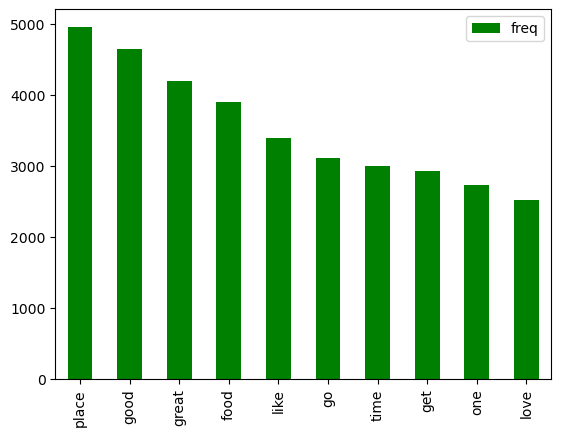

In [141]:
word_freq.head(10).plot(kind='bar', color='Green')

<Axes: >

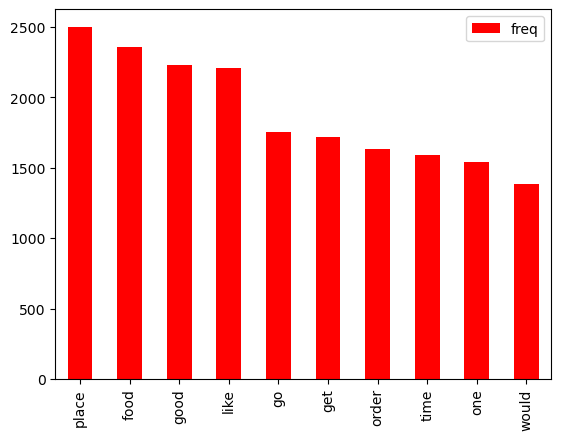

In [142]:
word_freq2 = pd.DataFrame(Negative_review_dtm.apply(sum), columns=['freq'])
word_freq2.sort_values('freq', ascending=False, inplace=True)
word_freq2.head(10).plot(kind='bar', color='Red')

In [143]:
Negative_review[15]

'worth 21$ salad small pizza absolut bad servic mayb guy grandma die dont know want tell realli made mad experi order small pizza salad guy could care less took $ sat look around hmm sign say x larg pizza larg salad 23$ wow would nice guy told us left hungri mad unsatisfi owner teach employ valu upsel tell special someth small affect custom experi neg salad sever overpr wont go back unless im desper'

In [144]:
# geaerate word cloud on the basis of the frequencies

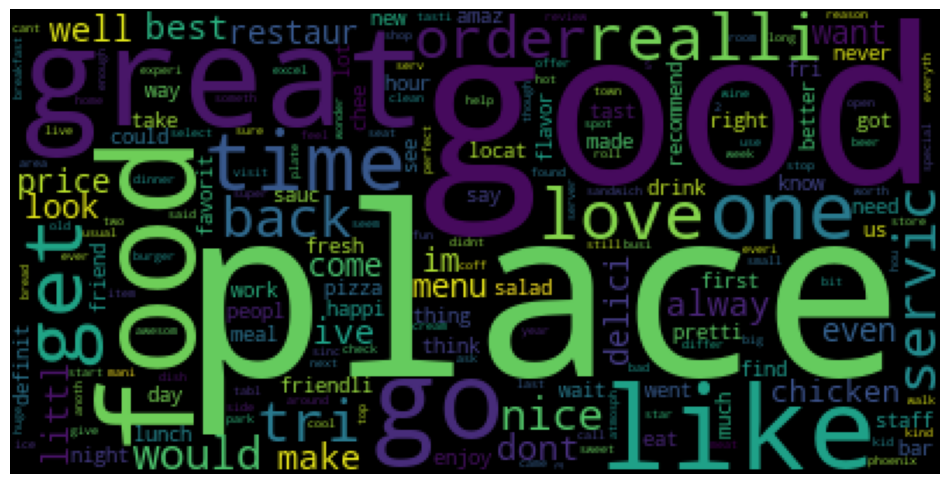

In [145]:
word_freq_dict = dict(Positive_review_dtm.apply(sum))
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color = 'black', stopwords = stop1).generate_from_frequencies(word_freq_dict)

plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [146]:
word_freq_dict

{'1': 265,
 '10': 328,
 '100': 97,
 '12': 141,
 '15': 120,
 '2': 606,
 '20': 187,
 '3': 537,
 '30': 107,
 '4': 441,
 '4 star': 107,
 '5': 625,
 '5 star': 206,
 '6': 180,
 '7': 135,
 '8': 129,
 '9': 109,
 'abl': 250,
 'absolut': 287,
 'accommod': 90,
 'across': 169,
 'actual': 439,
 'ad': 164,
 'add': 216,
 'addit': 137,
 'afford': 86,
 'afternoon': 126,
 'ago': 208,
 'agr': 107,
 'allow': 101,
 'almost': 310,
 'alon': 99,
 'along': 196,
 'alreadi': 150,
 'although': 280,
 'alway': 1583,
 'alway good': 90,
 'amaz': 983,
 'ambianc': 172,
 'american': 105,
 'amount': 210,
 'anoth': 471,
 'anyon': 199,
 'anyth': 389,
 'anyway': 190,
 'anywh': 143,
 'appet': 377,
 'appl': 96,
 'appreci': 137,
 'area': 751,
 'arent': 129,
 'arizona': 227,
 'around': 689,
 'arriv': 243,
 'art': 147,
 'asada': 88,
 'asian': 141,
 'ask': 687,
 'ate': 194,
 'atmosph': 595,
 'attend': 87,
 'attent': 310,
 'authent': 185,
 'avail': 148,
 'averag': 122,
 'away': 366,
 'awesom': 718,
 'az': 218,
 'babi': 98,
 'back'

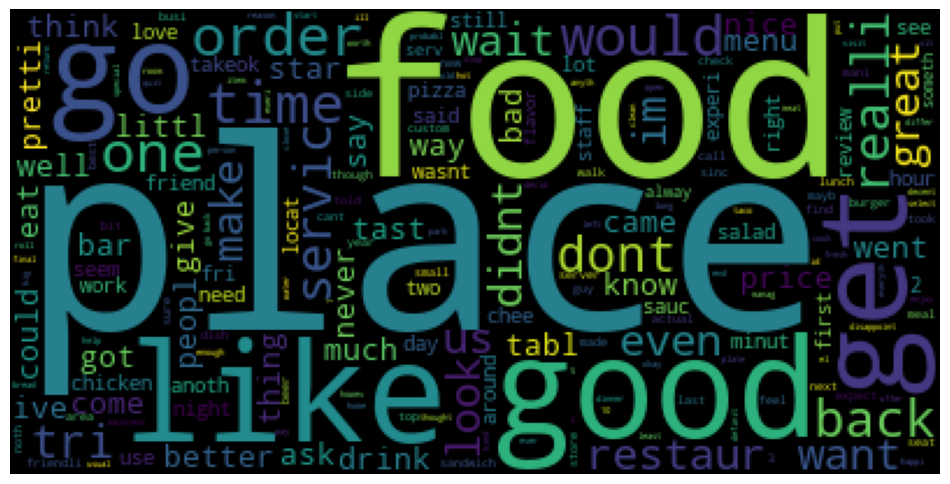

In [147]:
word_freq_dict1 = dict(Negative_review_dtm.apply(sum))
wordcloud2 = WordCloud(background_color = 'black', stopwords = stop).generate_from_frequencies(word_freq_dict1)

plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(wordcloud2)
plt.show()

In [148]:
#word similarity, using DTM matrix

In [149]:
corr = Positive_review_dtm.corrwith(Positive_review_dtm.food) 

In [ ]:
corr

In [152]:
corr1 = Negative_review_dtm.corrwith(Negative_review_dtm.love)
 #word similarity, able vs other words in negative reviews
# just correalation with corpus we have at hand

In [153]:
corr1.sort_values(ascending = False)

love            1.000000
realli          0.141992
chocol          0.141096
seat            0.132867
sad             0.126724
                  ...   
custom         -0.029712
mexican        -0.034699
bell           -0.034731
overcook       -0.034770
mexican food   -0.037640
Length: 1000, dtype: float64

In [154]:
Positive_review_dtm.T # TDM term document metric

0     1     2     3     4     5     6     7     8     9     ...  6853  \
1         0     0     0     0     0     0     0     0     0     0  ...     0   
10        0     0     0     0     0     0     0     0     0     0  ...     0   
100       0     0     0     0     0     1     0     0     0     0  ...     0   
12        0     0     0     0     0     0     0     0     0     0  ...     0   
15        0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
youll     0     0     0     0     0     0     0     0     0     0  ...     0   
young     0     0     0     0     0     0     0     0     0     0  ...     0   
youv      0     0     0     0     1     0     0     0     0     0  ...     0   
yum       0     0     0     0     0     1     0     0     0     0  ...     0   
yummi     0     0     0     0     0     0     1     0     0     0  ...     0   

       6854  6855  6856  6857  6858  6859  6860  6861  6862  
1         0     0     0     0     0     0     0     0     0  
10        0     0     0     0     0     0     0     0     0  
100       0     0     0     0     0     0     0     0     0  
12        0     0     0     0     0     0     0     0     0  
15        0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
youll     0     0     0     0     0     0     0     0     0  
young     0     0     0     0     0     0     0     0     0  
youv      0     0     0     0     0     0     0     0     0  
yum       0     0     0     0     0     0     0     0     0  
yummi     0     0     0     0     0     0     0     0     0  

[1000 rows x 6863 columns]

In [155]:
#document similarity, review similarities
corr_docs = Positive_review_dtm.T.corrwith(Positive_review_dtm.T[0]) 

In [156]:
corr_docs

0       1.000000
1       0.094631
2      -0.018167
3      -0.028161
4       0.017650
          ...   
6858    0.053976
6859    0.070106
6860    0.151159
6861    0.059131
6862    0.007627
Length: 6863, dtype: float64

In [157]:
Positive_review[0]

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semibusi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ive ever im pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came 2 piec griddl bread amaz absolut made meal complet best toast ive ever anyway cant wait go back'

In [160]:
Positive_review[3394]

'whole food awesom huge select organ vegetarian item delibakeri area tabl quick lunch dinner eat morningstar farm product good place get although wont find cheap place realli big select also good place get vitamin altern health product'

In [161]:
corr_docs.sort_values(ascending=False) # document 3394 is the most matching document w.r.t 0th doc in positive reviews

0       1.000000
3394    0.370370
5265    0.341273
3447    0.336114
2934    0.334823
          ...   
5025   -0.043475
729          NaN
2555         NaN
2811         NaN
4532         NaN
Length: 6863, dtype: float64

In [162]:
corr_docs1 = Negative_review_dtm.T.corrwith(Negative_review_dtm.T[0]) #document similarity, 

In [168]:
corr_docs1.sort_values(ascending=False)

0       1.000000
612     0.402771
468     0.378140
1645    0.351948
2364    0.297650
          ...   
1534   -0.039238
1710   -0.041447
604          NaN
2028         NaN
2917         NaN
Length: 3137, dtype: float64

In [167]:
Negative_review.reset_index().iloc[0][1]

'worth 21$ salad small pizza absolut bad servic mayb guy grandma die dont know want tell realli made mad experi order small pizza salad guy could care less took $ sat look around hmm sign say x larg pizza larg salad 23$ wow would nice guy told us left hungri mad unsatisfi owner teach employ valu upsel tell special someth small affect custom experi neg salad sever overpr wont go back unless im desper'

In [169]:
Negative_review.reset_index().iloc[612][1]

'tri rare earth first time solo diner often good way get take new restaur sat bar surprisingli uncomfort seat realli hard seat cut back knee wine select nice big two three choic varieti order glass wine small hou salad pizza server behe bar profess friendli wait began fifteen minut pass still salad abl get server attent ask salad didnt check statu salad gave excu sever peopl come around time 3 minut later salad pizza came time disappoint want eat salad didnt want pizza go cold note extrem thin pizzalik cracker crustso goe cold quickli server offer send pizza back keep hot sinc fresh tomato didnt want pizza ruin hou salad fresh good mushroom shave pecorino chee lot red onion dress hou vinaigrett strong vinegari onion vinegar overwhelm would order particular salad pizza good amount top held togeth pretti well even ider thin crust would like tri restaur sever thing menu sound realli good 4 star pizza 2 star salad order 3 star servic'

In [170]:
# 0 and 612 are the highest correlated documents in the negative reviews

In [171]:
# recommendations: given review: which are the most similar reviews
# predictive modelling
# Text Classification

## Text Classification

In [178]:
yelp['new_stars'] = np.where(yelp.stars >=4,1,0) # for binary classification

In [179]:
yelp['new_stars'].value_counts(normalize = True)# some imbalance but still we can work with it

new_stars
1    0.6863
0    0.3137
Name: proportion, dtype: float64

In [180]:
Y = yelp.stars # multinomial classification
X = yelp.reviews

In [181]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [182]:
train_X = train_X.apply(lambda x: clean_text(x))
train_X = pre_process(train_X)

test_X = test_X.apply(lambda x: clean_text(x))
test_X = pre_process(test_X)

In [183]:
train_X

3144    wife went sat patio near canal temperatur perf...
9939    brunch el chorro today wonder patio comfort um...
7925    love love love place tasti great price beat ne...
309     could give 25 star would ive joe real bbq know...
9415    could would two review golf cour self would ea...
                              ...                        
9785    wife well sever friend drive ahwatuk regular b...
7763    dinner frank & albert attend confer hotel norm...
5218    dont see big deal went soda machin broken food...
1346    dunno deal isbut terribl impress pretzel fondu...
3582    feel lot like wrap use locat love overhead doo...
Name: reviews, Length: 7000, dtype: object

In [184]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)

In [185]:
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [186]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [187]:
dtm_tfidf_test

1   10      100   12        15    2   20   25    3   30  ...  yeah  \
0     0.0  0.0  0.00000  0.0  0.117813  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1     0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2     0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3     0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4     0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
...   ...  ...      ...  ...       ...  ...  ...  ...  ...  ...  ...   ...   
2995  0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2996  0.0  0.0  0.48187  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2997  0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2998  0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2999  0.0  0.0  0.00000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   0.0   

      year      yelp       yet  yogurt  youll  young  youv  yum  yummi  
0      0.0  0.054915  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
1      0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
2      0.0  0.000000  0.131821     0.0    0.0    0.0   0.0  0.0    0.0  
3      0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
4      0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
...    ...       ...       ...     ...    ...    ...   ...  ...    ...  
2995   0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
2996   0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
2997   0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
2998   0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  
2999   0.0  0.000000  0.000000     0.0    0.0    0.0   0.0  0.0    0.0  

[3000 rows x 1000 columns]

In [ ]:
# Linear SVC Model

In [188]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [190]:
# training accuracy
from sklearn.metrics import classification_report
print(metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           1       0.85      0.81      0.83       531
           2       0.81      0.62      0.70       631
           3       0.68      0.53      0.60      1030
           4       0.66      0.70      0.68      2446
           5       0.70      0.77      0.73      2362

    accuracy                           0.70      7000
   macro avg       0.74      0.69      0.71      7000
weighted avg       0.70      0.70      0.70      7000



In [191]:
# testing accuracy
print(metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.50      0.46      0.48       218
           2       0.41      0.27      0.32       296
           3       0.35      0.28      0.31       431
           4       0.49      0.52      0.50      1080
           5       0.55      0.62      0.58       975

    accuracy                           0.49      3000
   macro avg       0.46      0.43      0.44      3000
weighted avg       0.48      0.49      0.48      3000



In [ ]:
# we got results for all the 5 stars as its multinomial classification
# we can see there is overfitting problem
# we can go towards the more complex model
# we can process data in a more better way 
# we can play with the features of tFidf vectorizer

In [ ]:
# Multinomial NB Model

In [198]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(dtm_tfidf_train, train_y)

# Make predictions on the testing data
y_pred = nb_classifier.predict(dtm_tfidf_test)

# Evaluate the model
print('training:\n',metrics.classification_report(train_y, nb_classifier.predict(dtm_tfidf_train)))
print('testing: \n',metrics.classification_report(test_y, nb_classifier.predict(dtm_tfidf_test)))

training:
               precision    recall  f1-score   support

           1       0.77      0.31      0.44       531
           2       0.72      0.05      0.10       631
           3       0.63      0.06      0.11      1030
           4       0.46      0.77      0.58      2446
           5       0.63      0.68      0.66      2362

    accuracy                           0.54      7000
   macro avg       0.64      0.38      0.38      7000
weighted avg       0.59      0.54      0.48      7000

testing: 
               precision    recall  f1-score   support

           1       0.65      0.21      0.32       218
           2       0.35      0.02      0.04       296
           3       0.39      0.03      0.06       431
           4       0.42      0.72      0.53      1080
           5       0.57      0.62      0.59       975

    accuracy                           0.48      3000
   macro avg       0.48      0.32      0.31      3000
weighted avg       0.48      0.48      0.42      3000



In [199]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(dtm_tfidf_train, train_y)

# Make predictions on the testing data
y_pred = logreg.predict(dtm_tfidf_test)

# Evaluate the model
print('training:\n',metrics.classification_report(train_y, logreg.predict(dtm_tfidf_train)))
print('testing: \n',metrics.classification_report(test_y, logreg.predict(dtm_tfidf_test)))

training:
               precision    recall  f1-score   support

           1       0.83      0.64      0.72       531
           2       0.77      0.43      0.55       631
           3       0.65      0.44      0.53      1030
           4       0.61      0.73      0.67      2446
           5       0.69      0.76      0.73      2362

    accuracy                           0.67      7000
   macro avg       0.71      0.60      0.64      7000
weighted avg       0.68      0.67      0.66      7000

testing: 
               precision    recall  f1-score   support

           1       0.60      0.41      0.49       218
           2       0.44      0.20      0.28       296
           3       0.40      0.27      0.33       431
           4       0.48      0.59      0.53      1080
           5       0.56      0.64      0.60       975

    accuracy                           0.51      3000
   macro avg       0.50      0.42      0.44      3000
weighted avg       0.50      0.51      0.50      3000



C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(dtm_tfidf_train, train_y)

# Make predictions on the testing data
y_pred = RF.predict(dtm_tfidf_test)

# Evaluate the model
print('training:\n',metrics.classification_report(train_y, RF.predict(dtm_tfidf_train)))
print('testing: \n',metrics.classification_report(test_y, RF.predict(dtm_tfidf_test)))

training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       531
           2       1.00      1.00      1.00       631
           3       1.00      1.00      1.00      1030
           4       1.00      1.00      1.00      2446
           5       1.00      1.00      1.00      2362

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

testing: 
               precision    recall  f1-score   support

           1       0.61      0.26      0.37       218
           2       0.44      0.04      0.07       296
           3       0.31      0.09      0.14       431
           4       0.42      0.64      0.51      1080
           5       0.54      0.62      0.58       975

    accuracy                           0.47      3000
   macro avg       0.46      0.33      0.33      3000
weighted avg       0.46      0.47      0.43      3000



In [201]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(dtm_tfidf_train, train_y)

# Make predictions on the testing data
y_pred = GB.predict(dtm_tfidf_test)

# Evaluate the model
print('training:\n',metrics.classification_report(train_y, GB.predict(dtm_tfidf_train)))
print('testing: \n',metrics.classification_report(test_y, GB.predict(dtm_tfidf_test)))

training:
               precision    recall  f1-score   support

           1       0.89      0.63      0.74       531
           2       0.95      0.48      0.64       631
           3       0.87      0.45      0.59      1030
           4       0.62      0.78      0.69      2446
           5       0.70      0.80      0.75      2362

    accuracy                           0.70      7000
   macro avg       0.81      0.63      0.68      7000
weighted avg       0.73      0.70      0.69      7000

testing: 
               precision    recall  f1-score   support

           1       0.55      0.29      0.38       218
           2       0.41      0.11      0.18       296
           3       0.40      0.18      0.25       431
           4       0.44      0.62      0.52      1080
           5       0.55      0.63      0.58       975

    accuracy                           0.48      3000
   macro avg       0.47      0.37      0.38      3000
weighted avg       0.48      0.48      0.46      3000



In [ ]:
# creating a predictive model
# inference applying model on a new data

In [206]:
rev = input()

'i love /.this place , it makes me feel good...'


In [207]:
#rev = 'I .dont like this place though i came here many time but their food quality is degrading than even before'
# rev = 'i love /.this place , it makes me feel good...'

In [208]:
clean_rev = ' '.join([i for i in clean_text(rev).split() if i not in stop])
#clean_rev = pre_process(clean_rev)

In [209]:
clean_rev

'love place makes feel good'

In [211]:
print('Linear SVC predicted rating',lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0])
print('NB predicted rating',nb_classifier.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0])
print('logreg predicted rating',logreg.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0])
print('RF predicted rating',RF.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0])
print('GB predicted rating',GB.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0])

Linear SVC predicted rating 5
NB predicted rating 5
logreg predicted rating 5
RF predicted rating 5
GB predicted rating 5


C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\navjo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [212]:
pred = np.where(lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0]>4, 'good place','just okay')
print(pred)

good place


In [213]:
# accuracy mught not be that high of these models used here, but they are classifying reviews correctly
# more focused preprocessing on text can increase accuracy, but it takes lot of time to process the 10000 reviews 
# more computation power is required